# Project: Create a report from a SQL database

## Introduction

This project is part of Udacity Business Analyst Nanodegree Program. The purpose of the project is to write SQL queries to extract and analyze data from a transactions database and prepare a set of visualizations.


### Sales trend

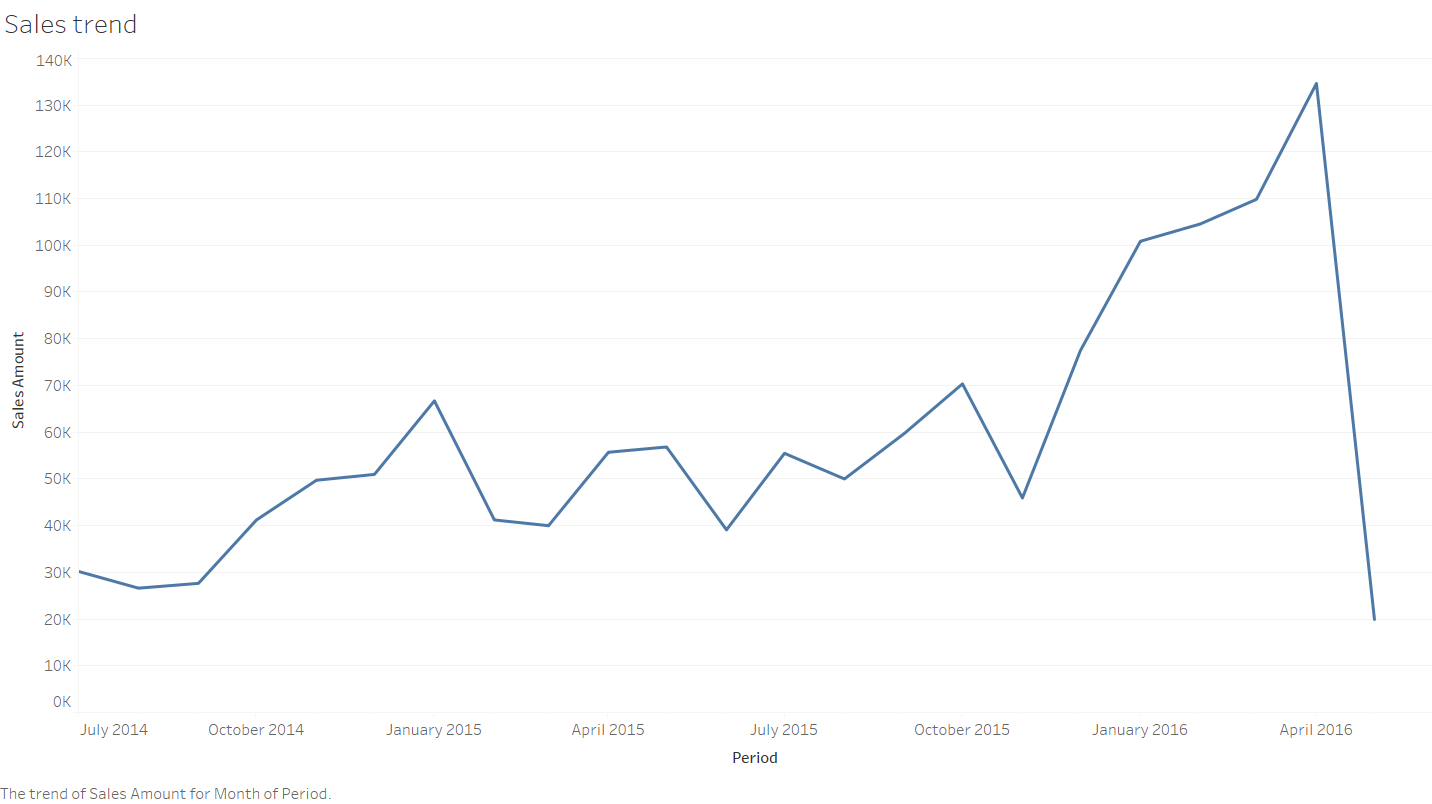

The line chart shows monthly sales from July 2014 till May 2016.
Sales increased dramatically in Q1 2016 but they dropped in May 2016.

#### SQL query

``` mysql
SELECT SUM (OrderDetails.UnitPrice * OrderDetails.Quantity) AS SalesAmount, STRFTIME('%m', Orders.OrderDate) AS Month, 
STRFTIME('%Y', Orders.OrderDate) AS Year,
STRFTIME('%m-%Y', Orders.OrderDate) AS Period
FROM OrderDetails
JOIN Orders
    ON OrderDetails.OrderID = Orders.OrderId
GROUP BY Month, Year
ORDER BY Year, Month;
```

### Top 10 products

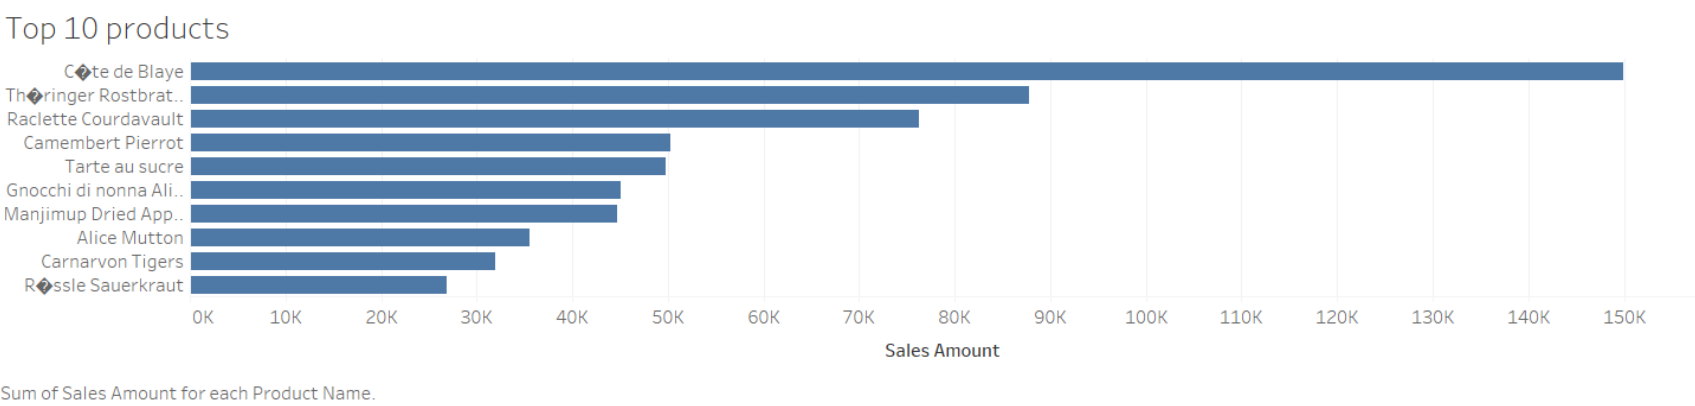

The bar chart shows the top 10 products by sales amount.
Cote de Blaye and Thuringian sausage are the two most relevant products in terms of revenues

#### SQL query

``` mysql
SELECT ProductName, SUM (OrderDetails.UnitPrice * OrderDetails.Quantity) AS SalesAmount
FROM Products
JOIN OrderDetails
    ON Products.ProductID = OrderDetails.ProductID
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
```

### Top 10 customers

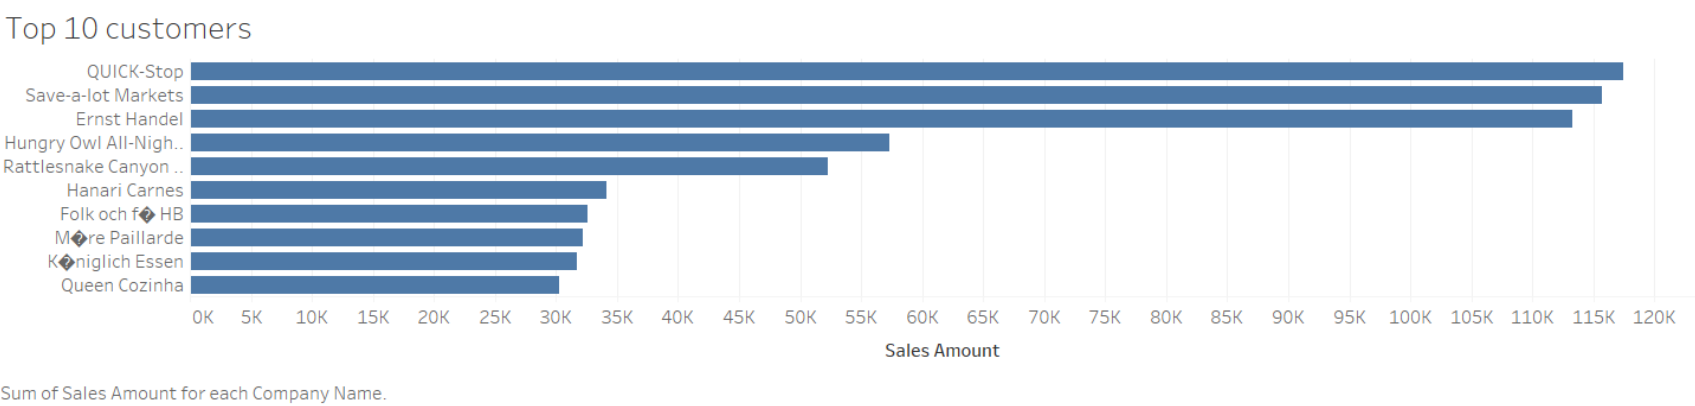

The bar chart shows the top 10 customers by sales amount.
QUICK-Stop, Save-a-lot Markets and Ernst Handel are the key accounts.

#### SQL query

``` mysql
SELECT Customers.CompanyName, SUM (OrderDetails.UnitPrice * OrderDetails.Quantity) AS SalesAmount
FROM Customers
JOIN Orders
    ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails
    ON OrderDetails.OrderID = Orders.OrderId
GROUP BY CompanyName
ORDER BY SalesAmount DESC
LIMIT 10;
```

### Sales by product category

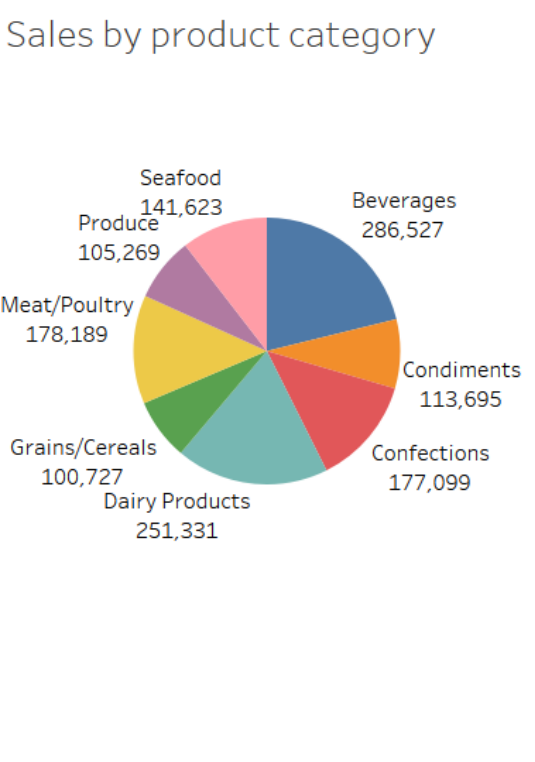

The pie chart shows the total sales amount split by product category.
Beverages and Dairy Products have the highest impact on turnover.

#### SQL query

``` mysql
SELECT ProductCategory, SalesAmount
FROM
    (SELECT Categories.CategoryName AS ProductCategory, SUM (OrderDetails.UnitPrice * OrderDetails.Quantity) AS SalesAmount
    FROM Categories
    JOIN Products
        ON Categories.CategoryID = Products.CategoryID
    JOIN OrderDetails
        ON OrderDetails.ProductID = Products.ProductID
    GROUP BY ProductCategory)
ORDER BY SalesAmount DESC;
```